# Stock prediction

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv(r"C:\Users\acer\Downloads\Netflix\NFLX.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [4]:
#return null values count if present
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
#retuen summary of the data 
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [6]:
df.duplicated().sum()

0

In [7]:
df.shape 

(1009, 7)

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

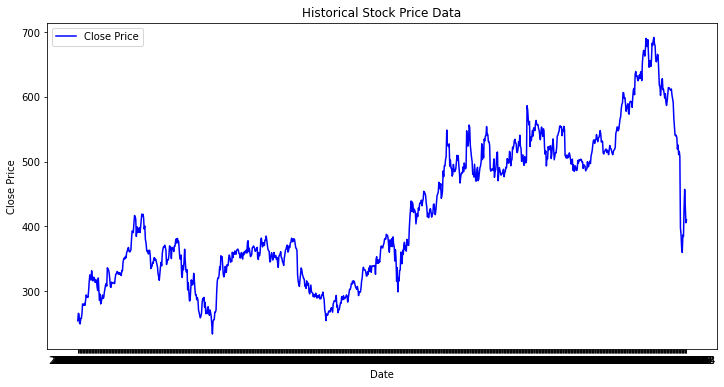

In [11]:
# Extract relevant columns
date = df['Date']
close_price = df['Close']

# Create a time series plot for the stock's closing price
plt.figure(figsize=(12, 6))
plt.plot(date, close_price, label='Close Price', color='blue')
plt.title('Historical Stock Price Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()


# Data Modeling

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

Reshapes the 1D array into a 2D array with a single column. The -1 in the reshape function is used to infer the number of rows automatically, ensuring that the number of rows in the reshaped array matches the original data.
The result is a 2D array where each row contains a single 'Close' price.

In [12]:
# Extract the 'Close' prices as the target variable
data = df['Close'].values.reshape(-1, 1)


In [13]:
data


array([[254.259995],
       [265.720001],
       [264.559998],
       ...,
       [429.480011],
       [405.600006],
       [410.170013]])

The purpose of normalization is to make the data more suitable for training neural networks, as it helps to stabilize training and ensures that features with different scales do not dominate the learning process. 

In [16]:
# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

The look-back window determines how many previous time steps (historical data points) the model considers when making predictions.

In [17]:
# Define the look-back window for the LSTM model
look_back = 30 

The code below creates a dataset where each row in X represents a sequence of look_back historical 'Close' prices, and the corresponding value in y represents the next 'Close' price that you want to predict. This dataset is structured for training a sequential model like an LSTM for stock price prediction.

In [18]:
# Create a dataset with input features and target values
X, y = [], []
for i in range(len(data) - look_back):
    X.append(data[i:i+look_back])
    y.append(data[i+look_back])

X, y = np.array(X), np.array(y)

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# LSTM Model

In [20]:
# Build an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

In [23]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, callbacks=[early_stopping])


Epoch 1/20
13/13 [==============================] - 0s 24ms/step - loss: 6.7751e-04
Epoch 2/20
13/13 [==============================] - 0s 23ms/step - loss: 6.9000e-04
Epoch 3/20
13/13 [==============================] - 0s 25ms/step - loss: 5.8459e-04
Epoch 4/20
13/13 [==============================] - 0s 24ms/step - loss: 5.7142e-04
Epoch 5/20
13/13 [==============================] - 0s 29ms/step - loss: 6.9446e-04
Epoch 6/20
13/13 [==============================] - 0s 23ms/step - loss: 5.9910e-04
Epoch 7/20
13/13 [==============================] - 0s 23ms/step - loss: 6.0215e-04
Epoch 8/20
13/13 [==============================] - 0s 23ms/step - loss: 5.6944e-04
Epoch 9/20
13/13 [==============================] - 0s 30ms/step - loss: 5.6638e-04
Epoch 10/20
13/13 [==============================] - 0s 23ms/step - loss: 6.0205e-04
Epoch 11/20
13/13 [==============================] - 0s 23ms/step - loss: 6.6734e-04
Epoch 12/20
13/13 [==============================] - 0s 27ms/step - loss: 

In [24]:
# Make predictions
y_pred = model.predict(X_test)


7/7 [==============================] - 0s 9ms/step


In [25]:
# Inverse transform the scaled data to get real stock prices
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)


# Evaluation

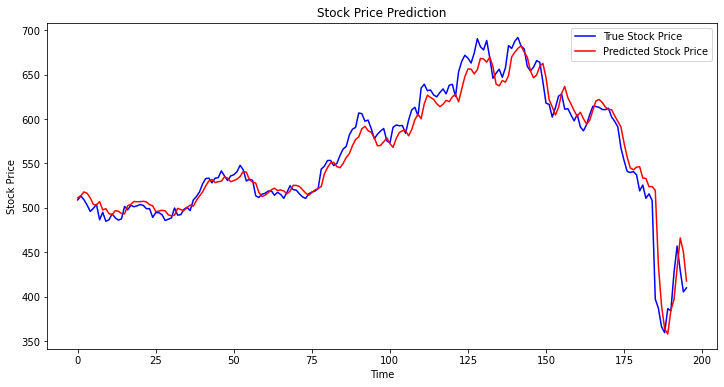

In [26]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Stock Price', color='blue')
plt.plot(y_pred, label='Predicted Stock Price', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()